In [3]:
#importing libraries
import numpy as np
import pandas as pd
from sklearn import datasets

# Handling & Encoding the categorical data 

In [18]:
#reading the dataset 
train = pd.read_csv(r'C:\Users\2000139\OneDrive - TCS COM PROD\Desktop\tcs task\pima-indians-diabetes.txt',header=None)
train.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
from sklearn.preprocessing import OrdinalEncoder
# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
result = encoder.fit_transform(train)
print(result)

[[  6.  86.  22. ... 350.  29.   1.]
 [  1.  23.  19. ... 196.  10.   0.]
 [  8. 121.  17. ... 368.  11.   1.]
 ...
 [  5.  59.  22. ... 115.   9.   0.]
 [  1.  64.  14. ... 195.  26.   1.]
 [  1.  31.  21. ... 169.   2.   0.]]


In [25]:
# Create features
df = pd.DataFrame({'Score': ['Low', 'Low', 'Medium', 'Medium', 'High']})
# View data frame
print(df)
    
# Create Scale Map
scale_mapper = {'Low':1, 'Medium':2, 'High':3}
    
# Map feature values to scale
df['Scale'] = df['Score'].replace(scale_mapper)
    
# View data frame
print(df)

    Score
0     Low
1     Low
2  Medium
3  Medium
4    High
    Score  Scale
0     Low      1
1     Low      1
2  Medium      2
3  Medium      2
4    High      3


In [27]:
from sklearn.preprocessing import OneHotEncoder
# define one hot encoding
encoder = OneHotEncoder(sparse=False)
# transform data
onehot = encoder.fit_transform(train)
print(onehot)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 1. 0.]]


In [28]:
#Dummy Variable Encoding
# define one hot encoding
encoder = OneHotEncoder(drop='first', sparse=False)
# transform data
onehot = encoder.fit_transform(train)
print(onehot)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]]


# Splitting the dataset

In [30]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [31]:
#reading the dataset 
car = pd.read_csv(r'C:\Users\2000139\OneDrive - TCS COM PROD\Desktop\tcs task\car_mileage.csv')
car.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [43]:
x=car.mpg
y=car.cyl

In [77]:
# create training and testing vars
X_train,X_test,y_train,y_test=train_test_split(x,y)

In [78]:
#increse Diamensions of the data
X_train=X_train[:,np.newaxis]
X_test=X_test[:,np.newaxis]

<ipython-input-78-079535f83527>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train=X_train[:,np.newaxis]
<ipython-input-78-079535f83527>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_test=X_test[:,np.newaxis]


In [75]:
#fit the model on the training data
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [52]:
pred=reg.predict(X_test)
pred

array([6.43634748, 7.14758366, 8.47195446, 7.22115981, 5.03840052,
       5.87226362, 7.29473597, 3.5668774 ])

In [51]:
pred[0:5]

array([6.43634748, 7.14758366, 8.47195446, 7.22115981, 5.03840052])

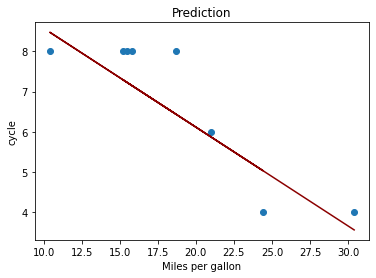

In [56]:
plt.title('Prediction')
plt.xlabel('Miles per gallon')
plt.ylabel('cycle')
plt.scatter(X_test,y_test)
plt.plot(X_test,pred,color='darkred')

# Cross Validation

In [71]:
from sklearn.model_selection import KFold # import KFold
X = np.array(car.mpg) # create an array
y = np.array(car.cyl) # Create another array
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 

KFold(n_splits=2, random_state=None, shuffle=False)


In [72]:
for train_index, test_index in kf.split(X):
 print("TRAIN:", train_index, "TEST:", test_index)
 X_train, X_test = X[train_index], X[test_index]
 y_train, y_test = y[train_index], y[test_index]

TRAIN: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] TEST: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]


# Feature Scaling

In [1]:
# Sklearn library 
from sklearn import preprocessing

In [4]:
#reading  dataset
feature = pd.read_csv(r'C:\Users\2000139\OneDrive - TCS COM PROD\Desktop\tcs task\iris.csv')
feature.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [20]:
# here Features - sepal.length and sepal.width columns 
# are taken using slicing
x = feature .iloc[:, 0:2].values
print(x[0:8])

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]]


In [36]:
#MIN MAX Normalization 
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
# Scaled feature
x_after_min_max_scaler = min_max_scaler.fit_transform(x)
print("\nAfter min max Normalization : \n",x_after_min_max_scaler[0:8])


After min max Normalization : 
 [[0.22222222 0.625     ]
 [0.16666667 0.41666667]
 [0.11111111 0.5       ]
 [0.08333333 0.45833333]
 [0.19444444 0.66666667]
 [0.30555556 0.79166667]
 [0.08333333 0.58333333]
 [0.19444444 0.58333333]]


In [35]:
#Standardisation
Standardisation = preprocessing.StandardScaler()  
# Scaled feature
x_after_Standardisation = Standardisation.fit_transform(x)
print("\nAfter Standardisation : \n",x_after_Standardisation[0:8])


After Standardisation : 
 [[-0.90068117  1.01900435]
 [-1.14301691 -0.13197948]
 [-1.38535265  0.32841405]
 [-1.50652052  0.09821729]
 [-1.02184904  1.24920112]
 [-0.53717756  1.93979142]
 [-1.50652052  0.78880759]
 [-1.02184904  0.78880759]]


# PCA

In [40]:
X = feature .iloc[:, 0:2].values
y = feature .iloc[:, 2].values

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
y_train = y_train.astype(int)

In [66]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [67]:
#Applying PCA function on training and testing set of X component
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_

In [69]:
# Fitting Logistic Regression To the training set
LogisticRegression(solver='lbfgs', max_iter=100)
from sklearn.linear_model import LogisticRegression 
 
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [70]:
# Predicting the test set result using predict function under LogisticRegression
y_pred = classifier.predict(X_test)

In [71]:
# making confusion matrix between
#  test set of Y and predicted value.
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, y_pred)

ValueError: Classification metrics can't handle a mix of continuous and multiclass targets

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

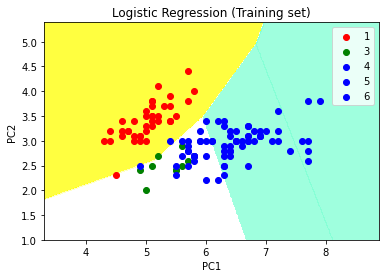

In [64]:

# Predicting the training set result through scatter plot
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
 
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
 
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
 
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend
 
# show scatter plot
plt.show()

In [74]:
data.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


# Feature Selection

In [73]:
#Univariate Selection
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv(r"C:\Users\2000139\OneDrive - TCS COM PROD\Desktop\tcs task\car_mileage.csv")
X = data.iloc[:,0:11]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=7)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(7,'Score'))  #print 10 best features

   Specs       Score
2   disp  648.337919
3     hp  615.725778
10  carb   28.755556
0    mpg   24.915155
7     vs    8.628571
1    cyl    7.298701
8     am    3.703297


[0.09709804 0.10404087 0.16539673 0.1438227  0.10881829 0.11762554
 0.11170964 0.05282318 0.03021798 0.06844704]


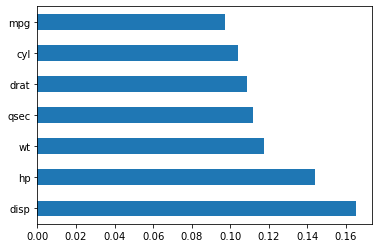

In [79]:
#Feature Importance
import pandas as pd
import numpy as np
data = pd.read_csv(r"C:\Users\2000139\OneDrive - TCS COM PROD\Desktop\tcs task\car_mileage.csv")
X = data.iloc[:,0:10]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

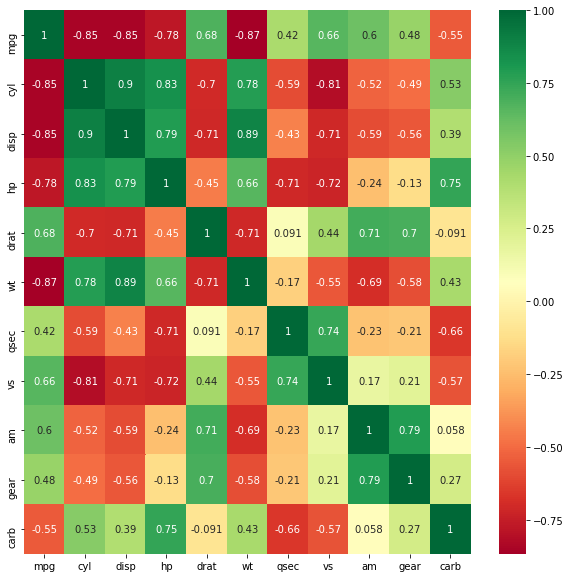

In [84]:
#Correlation Matrix with Heatmap
import pandas as pd
import numpy as np
import seaborn as sns
data = pd.read_csv(r"C:\Users\2000139\OneDrive - TCS COM PROD\Desktop\tcs task\car_mileage.csv")
X = data.iloc[:,0:10]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Feature engineering 

In [6]:
import pandas as pd
import numpy as np
passengers = pd.read_csv(r"C:\Users\2000139\OneDrive - TCS COM PROD\Desktop\tcs task\AirPassengersImpute.csv")
passengers 

,Id,x
0,1,112.0
1,2,118.0
2,3,132.0
3,4,129.0
4,5,121.0
...,...,...
139,140,606.0
140,141,NaN
141,142,NaN
142,143,390.0


In [33]:
threshold = 1
#Dropping columns with missing value rate higher than threshold
passengers  = passengers [passengers .columns[passengers .isnull().mean() < threshold]]

#Dropping rows with missing value rate higher than threshold
passengers  = passengers .loc[passengers .isnull().mean(axis=1) < threshold]
passengers

,Id,x,Rolling x Average,x Standard Deviation,Rolling x Standard Deviation,Rolling x Sum
0,1,112.0,NaN,138.398714,NaN,NaN
1,2,118.0,115.0,138.398714,4.242641,NaN
2,3,132.0,125.0,138.398714,9.899495,362.0
3,4,129.0,130.5,138.398714,2.121320,379.0
4,5,121.0,125.0,138.398714,5.656854,382.0
...,...,...,...,...,...,...
139,140,606.0,614.0,138.398714,11.313708,1763.0
140,141,0.0,303.0,138.398714,428.506709,1228.0
141,142,0.0,0.0,138.398714,0.000000,606.0
142,143,390.0,195.0,138.398714,275.771645,390.0


In [15]:
#Filling all missing values with 0
passengers  = passengers .fillna(0)
#Filling missing values with medians of the columns
passengers  = passengers .fillna(passengers .median())
passengers 

,Id,x
0,1,112.0
1,2,118.0
2,3,132.0
3,4,129.0
4,5,121.0
...,...,...
139,140,606.0
140,141,0.0
141,142,0.0
142,143,390.0


In [17]:
#Max fill function for categorical columns
passengers ['x'].fillna(passengers ['x'].value_counts().idxmax(), inplace=True)
passengers 

,Id,x
0,1,112.0
1,2,118.0
2,3,132.0
3,4,129.0
4,5,121.0
...,...,...
139,140,606.0
140,141,0.0
141,142,0.0
142,143,390.0


In [20]:
#Dropping the outlier rows with standard deviation
factor = 3
upper_lim = passengers ['x'].mean () + passengers ['x'].std () * factor
lower_lim = passengers ['x'].mean () - passengers ['x'].std () * factor
passengers  = passengers [(passengers ['x'] < upper_lim) & (passengers ['x'] > lower_lim)]
passengers 

,Id,x
0,1,112.0
1,2,118.0
2,3,132.0
3,4,129.0
4,5,121.0
...,...,...
139,140,606.0
140,141,0.0
141,142,0.0
142,143,390.0


In [25]:
#Window Rolling Mean (Moving Average)
passengers ['Rolling x Average'] = passengers['x'].rolling(2).mean()
passengers 

,Id,x,Rolling x Average
0,1,112.0,NaN
1,2,118.0,115.0
2,3,132.0,125.0
3,4,129.0,130.5
4,5,121.0,125.0
...,...,...,...
139,140,606.0,614.0
140,141,0.0,303.0
141,142,0.0,0.0
142,143,390.0,195.0


In [30]:
#Window Rolling Standard Deviation
passengers ['x Standard Deviation'] = passengers ['x'].std()
passengers ['Rolling x Standard Deviation'] = passengers ['x'].rolling(2).std()
passengers 

,Id,x,Rolling x Average,x Standard Deviation,Rolling x Standard Deviation,Rolling x Sum
0,1,112.0,NaN,138.398714,NaN,NaN
1,2,118.0,115.0,138.398714,4.242641,NaN
2,3,132.0,125.0,138.398714,9.899495,362.0
3,4,129.0,130.5,138.398714,2.121320,379.0
4,5,121.0,125.0,138.398714,5.656854,382.0
...,...,...,...,...,...,...
139,140,606.0,614.0,138.398714,11.313708,1763.0
140,141,0.0,303.0,138.398714,428.506709,1228.0
141,142,0.0,0.0,138.398714,0.000000,606.0
142,143,390.0,195.0,138.398714,275.771645,390.0


In [34]:
# Window Rolling Sum
passengers ['Rolling x Sum'] = passengers ['x'].rolling(3).sum()
passengers 

,Id,x,Rolling x Average,x Standard Deviation,Rolling x Standard Deviation,Rolling x Sum
0,1,112.0,NaN,138.398714,NaN,NaN
1,2,118.0,115.0,138.398714,4.242641,NaN
2,3,132.0,125.0,138.398714,9.899495,362.0
3,4,129.0,130.5,138.398714,2.121320,379.0
4,5,121.0,125.0,138.398714,5.656854,382.0
...,...,...,...,...,...,...
139,140,606.0,614.0,138.398714,11.313708,1763.0
140,141,0.0,303.0,138.398714,428.506709,1228.0
141,142,0.0,0.0,138.398714,0.000000,606.0
142,143,390.0,195.0,138.398714,275.771645,390.0
